<a href="https://colab.research.google.com/github/Preeyam1/project1/blob/master/ML_model_Decesion_Tree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import *
from sklearn import preprocessing


In [ ]:
data = pd.read_csv('bank.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [ ]:
data.drop(columns=['contact'],inplace=True)

In [ ]:
data.drop(columns='education',inplace=True)

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

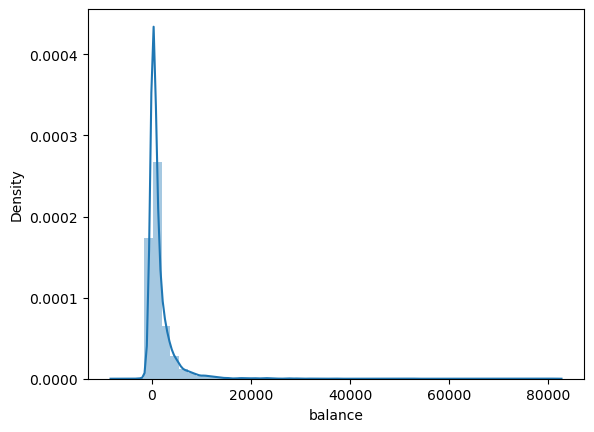

In [ ]:
sns.distplot(data['balance'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

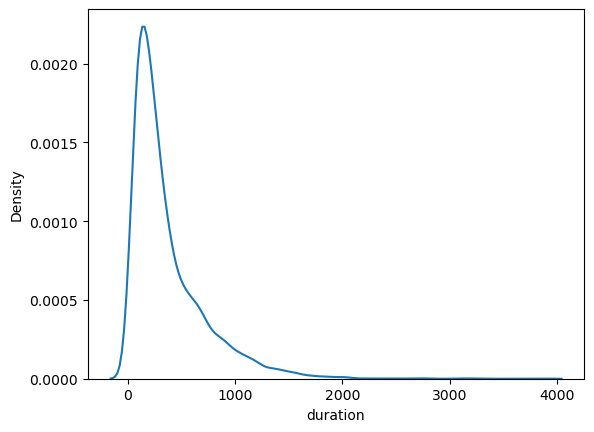

In [ ]:
sns.kdeplot(x='duration',data=data)

<AxesSubplot:xlabel='marital', ylabel='count'>

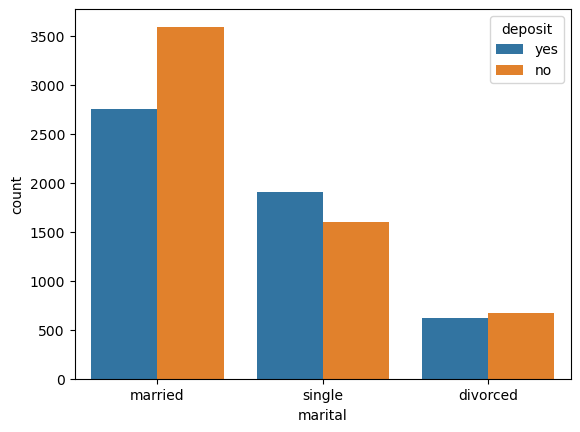

In [ ]:
sns.countplot(x='marital',hue='deposit',data=data)

<Figure size 800x600 with 0 Axes>

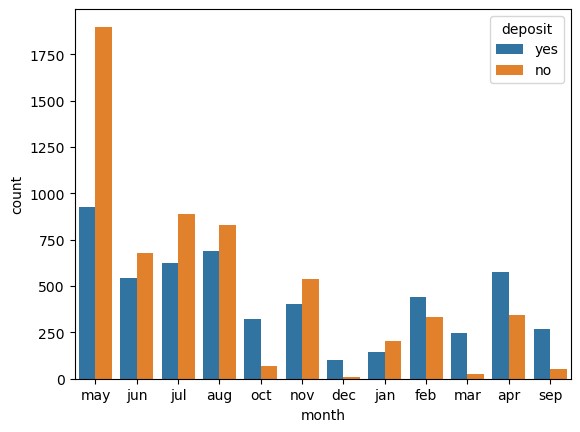

<Figure size 800x600 with 0 Axes>

In [ ]:
sns.countplot(x='month',hue='deposit',data=data)
plt.figure(figsize=(8,6))

<AxesSubplot:xlabel='job', ylabel='count'>

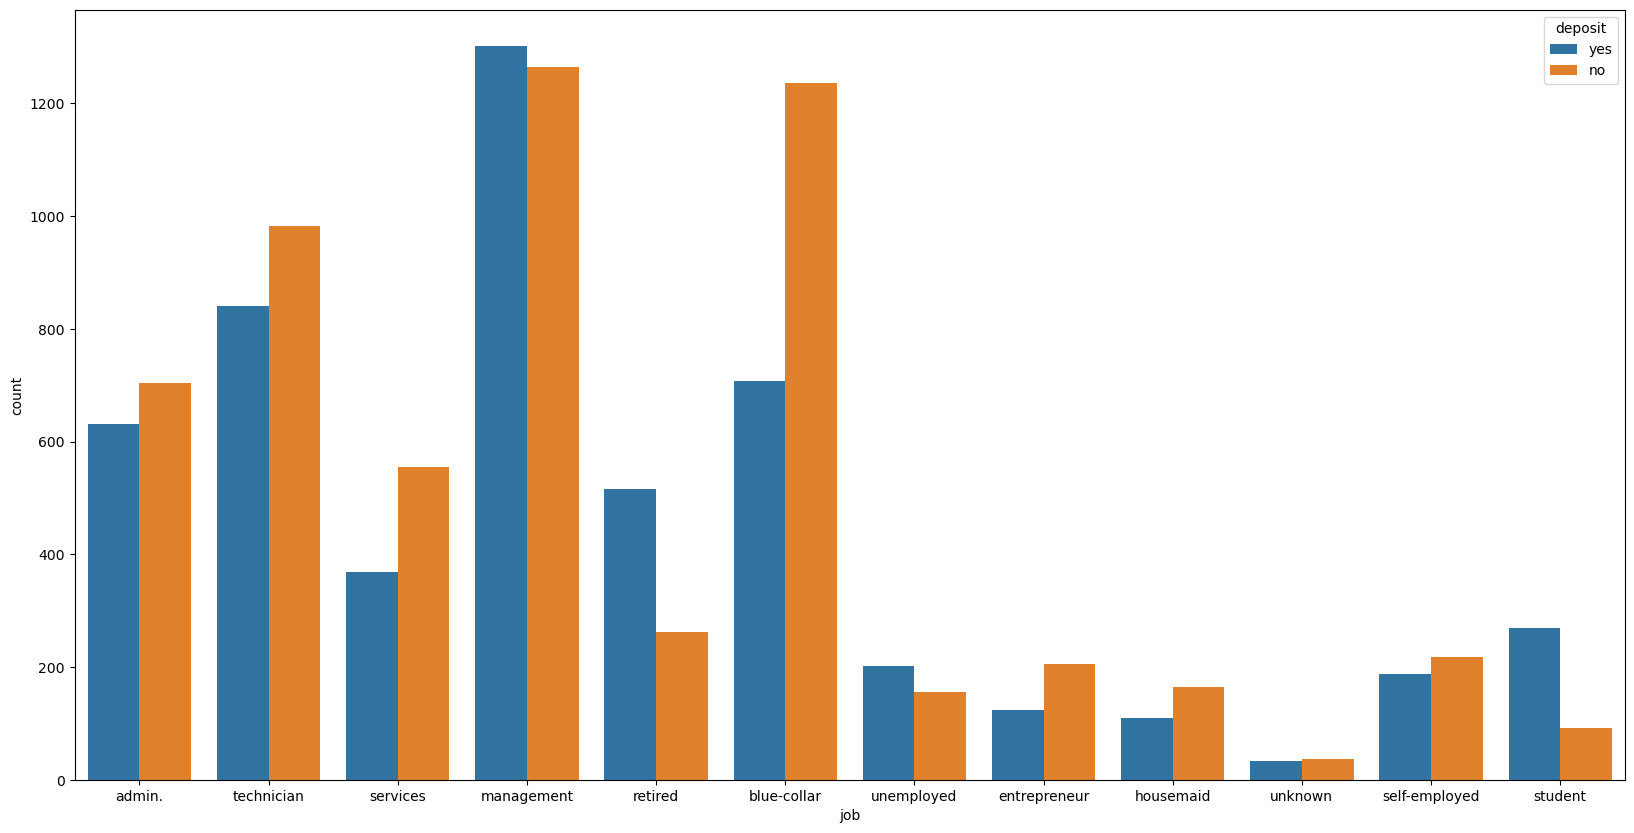

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='job',hue='deposit',data=data)

In [ ]:
data

In [ ]:
data.drop((data[data['duration']>=2000]).index, inplace=True)
data.drop((data[data['balance']>=20000]).index, inplace=True)


In [ ]:
cat=['job', 'marital', 'default', 'housing', 'loan', 'month', 'day', 'poutcome','deposit']
data1=sk.preprocessing.LabelEncoder()
for i in cat:
    data[i]=data1.fit_transform(data[i])
data

,age,job,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,0,2343,1,0,4,8,1042,1,-1,0,3,1
1,56,0,1,0,45,0,0,4,8,1467,1,-1,0,3,1
2,41,9,1,0,1270,1,0,4,8,1389,1,-1,0,3,1
3,55,7,1,0,2476,1,0,4,8,579,1,-1,0,3,1
4,54,0,1,0,184,0,0,4,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,19,0,257,1,-1,0,3,0
11158,39,7,1,0,733,0,0,15,6,83,4,-1,0,3,0
11159,32,9,2,0,29,0,0,18,1,156,2,-1,0,3,0
11160,43,9,1,0,0,0,1,7,8,9,2,172,5,0,0


In [ ]:
x=data.drop(['deposit'],axis=1).values
y=data['deposit'].values


In [ ]:
x_train,x_test,y_train,y_test=sk.model_selection.train_test_split(x,y,test_size=0.20)

In [ ]:
train=sk.tree.DecisionTreeClassifier(criterion='gini',min_samples_split=100,min_samples_leaf=10).fit(x_train,y_train)
train_score=train.score(x_train,y_train)
test_score=train.score(x_test,y_test)
print(train_score)
print(test_score)


0.8429490798238681
0.8162528216704289


In [ ]:
train=sk.tree.DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=125,min_samples_leaf=10).fit(x_train,y_train)
train_score=train.score(x_train,y_train)
test_score=train.score(x_test,y_test)
print(train_score)
print(test_score)


0.8335779609348538
0.8203160270880361


In [ ]:
train=sk.tree.DecisionTreeClassifier(criterion='gini',max_depth=11,min_samples_split=139,min_samples_leaf=17).fit(x_train,y_train)
train_score=train.score(x_train,y_train)
test_score=train.score(x_test,y_test)
print(train_score)
print(test_score)

0.8348199164502653
0.8167042889390519


In [ ]:
param_dist = {'max_depth': [10,11,12],
              'min_samples_split': [100,105,106,107,108],
              'min_samples_leaf': [10,11,12],
              'criterion': ['gini', 'entropy']}
search= sk.model_selection.GridSearchCV(train,cv=10,param_grid=param_dist,n_jobs=1).fit(x_train,y_train)
search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 10,
 'min_samples_split': 107}

In [ ]:
train=sk.tree.DecisionTreeClassifier(criterion='gini',max_depth=11,min_samples_split=107,min_samples_leaf=10).fit(x_train,y_train)
train_score=train.score(x_train,y_train)
test_score=train.score(x_test,y_test)
print(train_score)
print(test_score)

0.8383199729027887
0.818058690744921


In [ ]:
predict=train.predict(x_test)
print(predict)

[0 0 1 ... 1 1 1]


In [ ]:
auc=sk.metrics.roc_auc_score(predict,y_test)
fpr,tpr,_=sk.metrics.roc_curve(predict,y_test)

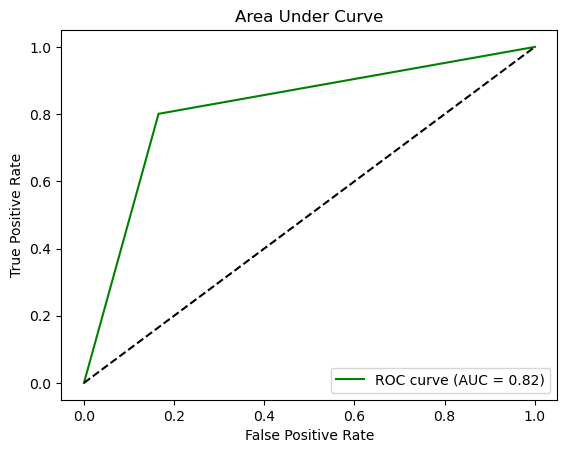

In [ ]:
plt.plot(fpr, tpr,color='green',label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
con=sk.metrics.confusion_matrix(predict,y_test)
con

array([[943, 187],
       [216, 869]], dtype=int64)

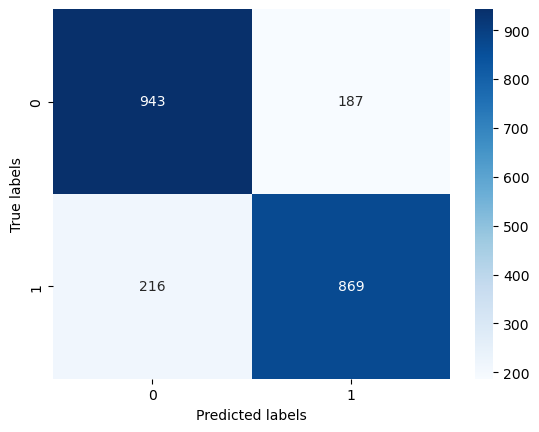

In [ ]:
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()